# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Regression metrics / loss functions
Week 3 | Lesson 3.1



### LEARNING OBJECTIVES
*After this lesson, you will be able to:*

- Explain the role of loss functions in regression
- Contrast use cases for RMSE and MAE

# Regression Metrics and Loss Functions

We've seen two examples of _loss functions_ earlier in the week in the context of regularization:
* The sum of squared errors:
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$
* Regularized versions
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \theta_i}$$
  * To use if overfitting is an issue

> Check: turn to a neighbor; take turns explaining these loss functions to each other.


Different loss functions are useful in different scenarios and there are two very popular loss functions that are used in conjuction with regression. They are sometimes referred to as _regression metrics_.

The first is the _root mean squared error_ or _RMSE_. If we have $n$ regression points and their predictions, the [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is:

$$\text{RMSE} = \sqrt{\frac{\sum_{i}{\left(\hat{y}_i - y_i \right)^2}}{n}}$$



The second is the _mean absolute error_ or _MAE_; it takes the absolute value of errors rather than their squares. The [MAE](https://en.wikipedia.org/wiki/Average_absolute_deviation) is:

$$\text{MAE} = \frac{\sum_{i}{|\hat{y}_i - y_i |}}{n}$$



## Why have different regression metrics?

There are lots of good reasons to use different loss functions. We've seen one -- regularization -- and now we'll consider the effects of outliers on these two metrics.

First let's try a very simplified statistics problem. Given a dataset, how can we summarize it with a single number?

This is equivalent to fitting a constant model to the data. It turns out that the _mean_ minimizes the RMSE and the _median_ minimizes the MAE. By analogy, when fitting a model, MAE is more tolerant to outliers. In other words, the degree of error of an outlier has a large impact when using RMSE versus the MAE. Since the choice of loss function affects model fit, it's important to consider how you want errors to impact your models.

**Summary**
* Use MAE when an extreme individual error should make little difference to the final result
* Use RMSE when more extreme errors should have a large impact

Finally, note that linear regressions with MAE instead of RMSE are called _least absolute deviation_ regressions rather than least squares regressions.


### Bonus regression metric: Modes!

It turns out the _mode_ minimizes the sum:
$$\frac{\sum_{i}{|\hat{y}_i - y_i |^{0}}}{n}$$
where $0^0=0$ and $x^0=1$ otherwise. Can you see why?

> Check: work it out with your neighbor

# Guided practice

Let's compute the RMSE and the MAE for a sample data set. Let's say we had a quadratic function that we fit a line to:

In [14]:
import numpy as np

In [20]:
xs = [-1, 0, 1, 2, 3]
ys = [x*x + 1 for x in xs] # true values
predictions = [2*x for x in xs]
print ys
print predictions

[2, 1, 2, 5, 10]
[-2, 0, 2, 4, 6]


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print "RMSE:", np.sqrt(mean_squared_error(ys, predictions))
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 2.60768096208
MAE: 2.0


Now let's add an outlier to the data.

In [26]:
xs.append(4)
ys.append(17)
predictions.append(8)

print "RMSE:", np.sqrt(mean_squared_error(ys, predictions))
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 5.88430114797
MAE: 4.625


Notice that the impact on the RMSE was relatively large, a factor of almost 3, versus an impact on the MAE with a factor of 1.5.

# Independent Practice

Let's explore two scenarios to obtain a better understanding of RMSE and MAE. First let's fit two models to the same set of data as above. To calculate the least mean absolute error we will use `statsmodels`.

In [24]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf

In [27]:
df = pd.DataFrame(np.array([xs, ys]).transpose(), columns=["x", "y"])
df.columns = ["x", "y"]

# By default, the quantile regression algorithm minimizes MAE
# http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.quantile_regression.QuantReg.html
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.7059
Model:                       QuantReg   Bandwidth:                       9.811
Method:                 Least Squares   Sparsity:                        14.17
Date:                Wed, 05 Oct 2016   No. Observations:                    8
Time:                        11:43:04   Df Residuals:                        6
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0000      3.834      0.261      0.803        -8.382    10.382
x              4.0000      1.366      2.927      0.026         0.657     7.343


//anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


This generated a fit of $y = 3 x + 1$. Let's see what a linear regression yields.

In [28]:
import statsmodels.api as sm

X = np.array(xs).transpose()
X = sm.add_constant(X)
# Fit and summarize OLS model
mod = sm.OLS(ys, X)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     40.18
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           0.000722
Time:                        11:43:17   Log-Likelihood:                -18.534
No. Observations:                   8   AIC:                             41.07
Df Residuals:                       6   BIC:                             41.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.5116      1.534      0.985      0.3

This yielded a fit of $y = 3 x + 1.6667$.

### Exercise

Plot the data with both functions. Which do you think fits the data better?

In [29]:
f1 = lambda x: 3*x + 1
...

Finally, let's explore another scenario. Linear regression has [several major assumptions](http://people.duke.edu/~rnau/testing.htm), one of which is  _constant variance_ or _homoscedasticity_ of errors. It means that the errors are distributed with the same variance about the best fit line regardless of the value of the independent variables.

In practice this means that data with a persistant level of background noise can cause regression metrics to be poorly estimated. Let's take a look.

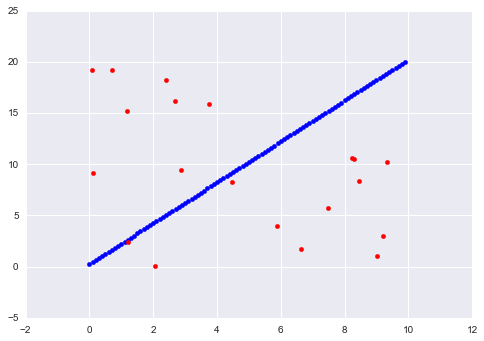

In [30]:
import random
from scipy.stats import norm
# Generate some data
xs = list(np.arange(0, 10, 0.1))
ys = [2*x + norm.pdf(0, 1) for x in xs]
# Add random background noise
xs2 = [10 * random.random() for i in range(20)]
ys2 = [20 * random.random() for i in range(20)]

# Plot the data sets
plt.scatter(xs, ys, color='b')
plt.scatter(xs2, ys2, color='r')
plt.show()

In [31]:
# Fit a line to the data
# Compute the RMSE and the MAE
# Plot the regression line


In [32]:
# Now try a MAE regression with statsmodels and plot it.
# You should see a much better fit.


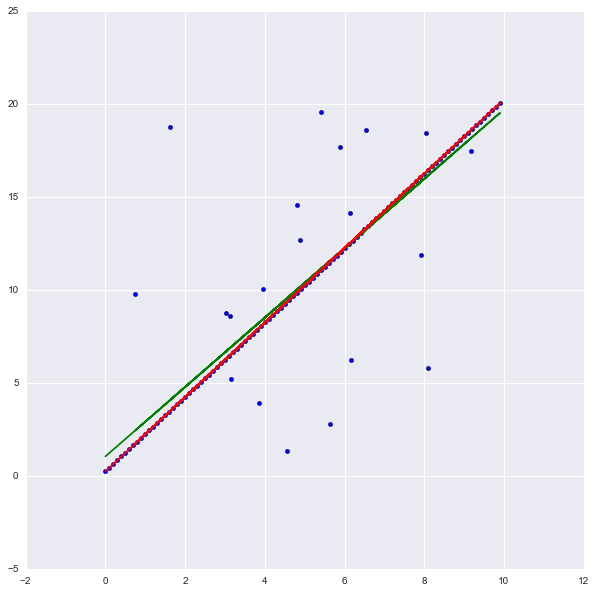

In [34]:
# Plot the data and the two fits